# Using Statistics to Determine Skill in Fantasy Football [Scipy/Numpy]

![](https://images.unsplash.com/photo-1490298357607-5dbac0afa2b2?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1225&q=80)

Photo Credit: Unsplash - Keith Johnston

# Table of Contents
* Importing all required packages
* Introduction - Did This Season "Count"?
* Question #1: Were individual player's results due to random chance?
    * Q1: Explanation of my approach
    * Q1: The code
    * Q1: Answer
* Tangent #1: Combinations, Permutations, and Runs
* Question #2: Did the outcome of the league as a whole show that we performed better than chance?
    * Q2: Explanation of my approach
    * Q2: The code
    * Q2: Answer
* Tangent #2: Binning Bias
* Question #3: When comparing the first half of the season to the second half, do players results stay consistent?
    * Q3: Explanation of my approach
    * Q3: The code
    * Q3: Answer
* Conclusion
* References

# Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from scipy import stats

# Introduction - Did This Season 'Count'?

==>**TLDR**: I played fantasy football for the first time and wondered if the win results were due to random chance or not.

This was my first year participating in Fantasy Football. I joined my coworkers and chatted throughout the season through Microsoft Teams, making trades and bragging when we got a win with some gifs. Our league had 14 people in it, which made finding good players on waivers difficult (i.e. swapping players mid-season). COVID-19 added to the difficulty of playing with 14 teams; we had to swap out players more frequently when some got sick, not to mention the players that were already getting injured or suspended. The frustration with the season was exemplified by a coworker who changed his team name to 'This Season Doesn't Count'.

After the season ended, I wondered if the season really did 'count'. Despite all of the unpredictable events, could some of the results be explained by my coworkers skill? Or could all results just be chalked up to chance?

To be fair, I'm not the first person who has wondered this. The fantasy sports website FanDuel actually approached MIT to help figure out if players results were due to random chance or not. This article explains their findings (the article title gives away the end result): [Researchers find most fantasy sports are based on skill, not luck](https://phys.org/news/2018-11-fantasy-sports-based-skill-luck.html). 

Despite MIT findings, I want to know if either my performance or my league's performance was due to chance or not. MIT was looking at the macro view (the whole industry) and I am looking at the micro view (just myself and my league). 

![](https://images.unsplash.com/photo-1610719887095-1c2d1486be5e?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80)
Photo Credit: Unsplash - Andy Henderson

# Question #1: Were individual player's results due to random chance?

## Q1: Explanation of my approach

==>**TLDR**: I use a binomial test (since my data is normally distributed) to start answering my questions. A binomial distribution differs from a normal distribution.

In this notebook, I will use the binomial test, a foundational concept in statistics, to address my questions. The binomial test can be used when your data follows a binomial distribution. If you don't remember what a binomial distribution is, it's simply something that has 2 outcomes (that's where the 'bi' in the name comes from). A coin toss is the simplest example of a binomial.

The first thing to establish is that this is not a normal distribution. The distinction between the two is that a binomial is based on discrete variables and a normal distribution is based on continuous variables.

I'm currently in my Master's and decided to ask my stats professor if I could use binomial distributions to help determine if the number of wins a player gets in a tournament is considered 'significant' or not. She said that it's a good start, which is all I can ask for to go ahead and start looking into seeing what we get. So without further ado, I will go ahead and try and answer some of these questions!

Before we continue, I should mention that in order to use a binomial distribution to test for significance, your data should meet the following 4 assumptions:
1. Fixed number of trials
2. Independent trials
3. Two different classifications
4. The probability of success stays the same for all trials

Here is the source article, which is one of many websites verifying these same assumptions:
[When Do You Use a Binomial Distribution?](https://www.thoughtco.com/when-to-use-binomial-distribution-3126596)

If you are new to using statistics in your work, one thing to always remember is that any statistical test relies on assumptions about the data and you should always check these assumptions before running the statistical analysis.

P.S. Please let me know if you have a better/different solution to this problem. See below for my work, any feedback is appreciated!

## Q1: The code

==>**TLDR**: I state my hypothesis and set the significance level

Before I go through the code and after I checked the assumptions, I still need to establish my null and alternate hypothesis:

$$H_o= \text{Player's outcomes were due to random chance (probability of winning=.5)}$$
$$H_a= \text{Player's outcomes were due to skill (probability of winning>.5)}$$

My significance level is .05 for this test. This means that a type I error (possibility of a false positive) would only occur 5% of the time if I reject the null hypothesis. For a binomial distribution and for this example, this means that 95% of all possible outcomes will be below the number of points that a player achieved. 

To clarify, the specific question I am answering is, "How many wins does it take for me to be confident the results were not due to random chance (that the player is actually skilled)?"

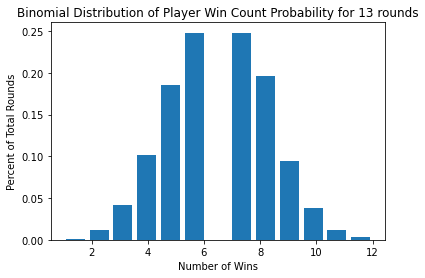

1-3 wins looks like it is below 5% and >=10 is below 5% of the total permutations for 13 rounds in the binomial distribution above


In [2]:
# Import the data
dat = pd.read_csv('/kaggle/input/fantasy-football-performance/Fantasy Football Performance.csv', index_col=0)

# Drop all rows that don't have any data
dat.dropna(how='all', inplace=True) 

# Sum the number of wins per team for the 13 rounds played (I'm excluding playoffs in my analysis)
wins_per_team = dat.sum(axis=1)

# Set variables for numpy binomial function
iterations = 10000
rounds = 13
probability = .5

# Create simulated binomial distribution data
wins = np.random.binomial(rounds, probability,iterations)

# Plot the binomial distribution - the graph represent the number of permutations with replacement for 13 rounds.
# See the 'tangent' section below for more information about permutations
fig, ax = plt.subplots()
plt.hist(wins, rwidth=.8, bins=13, density=True)
ax.set(xlabel='Number of Wins', ylabel='Percent of Total Rounds', title='Binomial Distribution of Player Win Count Probability for 13 rounds')
plt.show()

print('1-3 wins looks like it is below 5% and >=10 is below 5% of the total permutations for 13 rounds in the binomial distribution above')

To confirm what we are seeing above for our threshold of significance (>=10 wins), we can look at the percentile range of the simulated data

In [3]:
# To get our upper and lower bounds, we simply find the percentiles so define where 95% of the data lies
lower, upper = np.percentile(wins, [2.5,97.5]) # 

print('The lower bound for significance is {} and the upper bound is {}'.format(lower, upper))

# We can look at the number of permutations above 10 to see what our significance level is set at
sim_p = sum(wins >= 10)/len(wins)

# Now that you know how the binomial distribution works, here is how you would verify this information using the binom_test function from scipy
p = stats.binom_test(10,13, alternative='greater') 

print('You can see that the p-value for the test is {:.3f}, which is below our 5% significance level. This is close to the simulated data p-value \
of {:.3f}. for 10 wins and above'.format(p, sim_p))

The lower bound for significance is 3.0 and the upper bound is 10.0
You can see that the p-value for the test is 0.046, which is below our 5% significance level. This is close to the simulated data p-value of 0.045. for 10 wins and above


## Q1: Answer

Here were the results per team:

In [4]:
wins_per_team

Team Name
A Team                            7.0
Brookshire Pass-a-away            6.0
Comeback Kids                     3.0
Favre from Over                   4.0
Give Me All The Bacon And Eggs    9.0
It's Tua Time                     6.0
Jen's Jams                        7.0
Marauding Magpies                 7.0
MiddleEarth Northern Rangers      9.0
Mike's Castell Cougars            7.0
The Brady Bunch                   5.0
This Season Doesn't Count         9.0
Tracy's Toughies                  5.0
WRONG LEVEL GRONK                 6.0
dtype: float64

A player needed 10 or more wins for their results to not be attributed to chance. You can see that this was not the case and we fail to reject the null hypothesis. So it seems that we can't claim any player in the league was considered skilled (including me - my team name was called the 'A Team' and I only got 7 wins).

------------------------------------------------------------------------------------
# Tangent #1: Combinations, Permutations, and Runs

One thing I had to get straight when going through this was the differences between combinations, permutations, and runs. Basically a permutation is finding the number of possibilities where ordering matters and combinations is finding the number of possibilities where ordering does not matter.

==>**TLDR**: Here are 3 examples of combinations, permutations, and runs using coin flips as an example:
1. Runs: The probability of getting 3 heads in a row - e.g. .5 * .5 * .5 (.5^3)
2. Permutations with Replacement: An easy way to remember permutations is that it means simply shuffling the data around. The number of possibilites for 5 possible coin flips **where ordering matters**. This is what a binomial represents. For example, if you want to know the probability of getting 3 heads out of 5 coin tosses, you first find the number of permutations with replacement. This is done by taking the number of outcomes (2) multiplied by itself the number of trials completed. So in this case this is 2^5 or 32 outcomes that are possible. Then you find the number of outcomes that have 3 heads. In this case it is 10 so 10/32 = 31.25%. This means that we can expect 31.25% of the times when we flip 5 heads that we will get exactly 3 heads.
3. Permutations without Replacement: The number of possibilities for ordering a coin flip. Again, **ordering matters** since this is a permutation. For a coin this only two since there is either heads or tails or tails or heads. This is calculated using factorials. So a coin is 2! (i.e. 2 * 1).
4. Combinations: The number of possibilities **where ordering doesn't matter**. The number of combinations for a coin is 2 if you only choose one since when you flip the coin you can get either heads or tails. The typical way to state this combination for example would be 2 choose 1. 2 represents the number of objects in the set (heads or tails) and 1 represents the number of objects chosen from the set.

Combinations don't apply to binomials, since binomials are permutations with replacement. However, they are still important to understand for other statistical applications. Here is the formula for combinations:

$${n \choose r} = \frac{n!}{r!(n-r)!}\quad$$

As an example of another application, I'm going to use dice instead of coins since there are more than 2 possibilities. Imagine a dice with 3 sides. 3 choose 1 is 3 since there are 3 outcomes, 3 choose 2 is 3 - it can only be 12,13,23. It is 3* 2/2* 1 (the combinations formula in this case is 3!/2!(3!-2!))

Here is a good article for differentiating between permutations and combinations: [Combinations vs Permutations](https://medium.com/i-math/combinations-permutations-fa7ac680f0ac)

## If you want more in-depth explanations, keep reading below. Otherwise feel free to skip to question #2

* ### Runs

So first off is runs. We can use the classic coin flip to help explain what I mean. The chance of flipping heads or tails is 50%. Well, if we flip that coin 5 times, what is the chance that we will get 3 heads in a row. That is 50% to the 3rd power or .5 * .5 * .5, which is a 12.5% chance that you will get 3 heads in a row. Ok, so that's the run.

* ### Permutations with Replacement

**A binomial distribution is showing the number of permutations with replacement**. A permutation is the number of possibilites that you have when you shuffle around the outcomes, it is the number of outcomes in your problem space. The main difference between a permutation and combination is that in a permutation, ordering matters. In the code below, I show the number of permutations for 5 coin tosses.

In [5]:
# Printing out the number of possibilities for H (Heads) and T (Tails)
coin_flips = list(itertools.product("HT", repeat=5))
print('There are {} permutations for 5 coin flips \n'.format(len(coin_flips)))

print('Here are all of the combinations listed out, without repeating a sequence')
coin_flips

There are 32 permutations for 5 coin flips 

Here are all of the combinations listed out, without repeating a sequence


[('H', 'H', 'H', 'H', 'H'),
 ('H', 'H', 'H', 'H', 'T'),
 ('H', 'H', 'H', 'T', 'H'),
 ('H', 'H', 'H', 'T', 'T'),
 ('H', 'H', 'T', 'H', 'H'),
 ('H', 'H', 'T', 'H', 'T'),
 ('H', 'H', 'T', 'T', 'H'),
 ('H', 'H', 'T', 'T', 'T'),
 ('H', 'T', 'H', 'H', 'H'),
 ('H', 'T', 'H', 'H', 'T'),
 ('H', 'T', 'H', 'T', 'H'),
 ('H', 'T', 'H', 'T', 'T'),
 ('H', 'T', 'T', 'H', 'H'),
 ('H', 'T', 'T', 'H', 'T'),
 ('H', 'T', 'T', 'T', 'H'),
 ('H', 'T', 'T', 'T', 'T'),
 ('T', 'H', 'H', 'H', 'H'),
 ('T', 'H', 'H', 'H', 'T'),
 ('T', 'H', 'H', 'T', 'H'),
 ('T', 'H', 'H', 'T', 'T'),
 ('T', 'H', 'T', 'H', 'H'),
 ('T', 'H', 'T', 'H', 'T'),
 ('T', 'H', 'T', 'T', 'H'),
 ('T', 'H', 'T', 'T', 'T'),
 ('T', 'T', 'H', 'H', 'H'),
 ('T', 'T', 'H', 'H', 'T'),
 ('T', 'T', 'H', 'T', 'H'),
 ('T', 'T', 'H', 'T', 'T'),
 ('T', 'T', 'T', 'H', 'H'),
 ('T', 'T', 'T', 'H', 'T'),
 ('T', 'T', 'T', 'T', 'H'),
 ('T', 'T', 'T', 'T', 'T')]

You can see there are 32 permutations. You can plot the binomial distribution by taking what we had above. This will plot the theoretical binomial distribution.

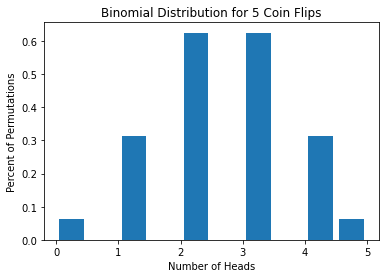

If you look at the distribution above, you can see 62.5% of the wins have 2 or 3 flips, 31.25% have 1 or 4, and 6.25% have 0 or 5 heads 

Here are the counts:
0     1
1     5
2    10
3    10
4     5
5     1
dtype: int64


In [6]:
# Counting the number of heads
count_wins = []
for i in coin_flips:
    count_wins.append(list(i).count('H'))

# Plotting the theoretical binomial distribution for 5 coin flips
fig, ax = plt.subplots()
plt.hist(count_wins, rwidth=.8, density=True)
ax.set(xlabel='Number of Heads', ylabel='Percent of Permutations', title='Binomial Distribution for 5 Coin Flips')
plt.show()

grouped = pd.Series(count_wins).value_counts().sort_index()

print('If you look at the distribution above, you can see 62.5% of the wins have 2 or 3 flips, 31.25% have 1 or 4, and 6.25% have 0 or 5 heads \n')
print('Here are the counts:')
print(grouped)

* ### Permutations without Replacement

This is the number of possibilities if you can't repeat any outcome. With a coin, there are only two permutations without replacement since there is just HT (Heads/Tails) or TH (Tails/Heads). If we had something like a 3 sided dice, it would be 3! (pronounced 3 factorial) or written another way: 3 * 2 * 1 = 6. 

* ### Combinations

This is the number of possibilities where ordering doesn't matter. So if we had 3 coins, how many different combinations are there irrespective of heads or tails? If we just thought about heads or tails, the answer for 2 choose 1 is 2 since there is either heads or tails (the term '2 choose 1' is how you normally describe combinations - I described this above, but the wikipedia article on combinations also explains this). Refer to the TLDR for this section for the combinations formula.

Additionally, 2 choose 2 is only 1 since ordering doesn't matter. But if we had 3 coins, you would have 3 * 2 /2 * 1 or 3 combos. This would be the following combinations: coins 1&3, coins 1&2, and coins 2&3. 

Notice in the denominator for a combination it is the permutations without replacement for the number of samples you choose from the set. By dividing the numerator by permutations without replacement, we eliminate the importance of ordering. 

We won't use combinations in this analysis, but it's important to understand the difference of combinations and permutations before continuing in order to set a foundation for what's going on in the binomial function.

----------------------------------------------------------------------------------------------------------------

# Question #2: Did the outcome of the league as a whole show that we performed better than chance?

## Q2: Explanation of my approach

==> **TLDR**: I use binomial tests on the league data too since the sum of multiple binomial distributions from individual players equals the league's binomial distribution in aggregate

Every individual player's results were due to random chance according to question one. Question two looks at the league's results and asks the same question, 'were the league's results different from random chance?' This is basically to see if we have some sort of [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.) that might be occurring and is just another check on our data to see if anything other than random chance was going on. 

For this section, I'll combine the binomial distributions for each player to answer this question. The reason I am doing this instead of t-test is because this is not a normal distribution since it is based on discrete events. The only resource I found with a quick google search that tries to explain this in more depth can be found [here](https://www.researchgate.net/post/How_do_I_do_a_nonparametric_Binomial_Test_or_One-sample_t-Test). However, because of the central limit theorem, with enough trials a binomial distribution (also called Bernoulli distribution) approximates a normal distribution (also called a Gaussian distribution). Proving this is beyond the scope of this article, but feel free to look at these resources:
* [Dartmouth Textbook - Central Limit Theorem](https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/Chapter9.pdf)
* [Boston College Textbook - Central Limit Theorem](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html#:~:text=The%20Central%20Limit%20Theorem%20applies,success%22%20on%20any%20given%20trial)

For my purposes, I will keep using binomial tests for binomial distributions since I don't quite understand the differences in p-values that I see and I know the binomial test in this context is more reliable. For example, if our league mean is 6.5 and the population mean is expected to be 6.5 (13 rounds * 50% chance), then we get a p-value of 1. However, with a binomial distribution, we get a p-value < 1. Please let me know if you understand this better than me and want to help explain it :)

Finally, combining binomial distributions is ok as long as the probabilities for the various binomial distributions were the same. Here are the two sources I used to corroborate this: 
* [Source one](https://en.wikipedia.org/wiki/Binomial_sum_variance_inequality#:~:text=In%20probability%20theory%20and%20statistics,the%20sum%20is%20not%20binomial_)
* [Source two](https://math.stackexchange.com/questions/1176385/sum-of-two-independent-binomial-variables)

 ## Q2: The Code
 
 Again, here is my null and alternate hypothesis:
 
$$H_o= \text{The league's outcome was due to random chance (probability of winning=.5)}$$
$$H_a= \text{The league's outcomes were due to skill (probability of winning>.5)}$$

The significance level is set at 5% again as well.

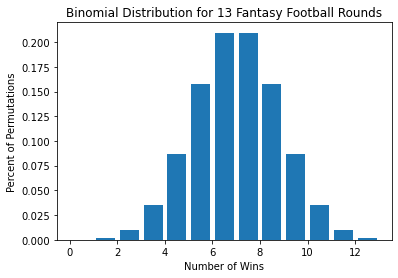

This is the cumulative number of wins starting from 0: [8192, 8191, 8178, 8100, 7814, 7099, 5812, 4096, 2380, 1093, 378, 92, 14, 1]

Here is the result when we use the binom scipy function: 0.13342285 and here is the result from our manual calculation 0.13342285. You can see that we match exactly since we understand the theory behind binomial distributions correctly.

Calculating the binomial distribution for all players combined is where we can't really do this manually anymore since the method we use above isn't very efficient. We would have to find the permutations for 182 rounds, which is 2^182. That is A LOT of combinations. We can get close to the true p-value by multiplying by 14 instead. I will do that and then show the answer using the binom_test function.

This is the approximate p-value for the league's binomial distribution using our manual calculation: 0.586

This is the actual p-value for the league's binomial distribution: 0.588

You wouldn't use a t-Test for this analys

In [7]:
# Create the binomial distribution using permutations with replacement (ordering matters)
num_wins = list(itertools.product("WL", repeat=13))
num_wins = [x.count('W') for x in num_wins]

# Plot the data - this is the binomial distribution for each player. 
fig, ax = plt.subplots()
plt.hist(num_wins, bins=13, rwidth=.8, density=True)
ax.set(xlabel='Number of Wins', ylabel='Percent of Permutations', title='Binomial Distribution for 13 Fantasy Football Rounds')
plt.show()

# Find the number of occurrences for each discrete number of wins 
num_wins_summary = pd.Series(num_wins).value_counts().sort_index()

# Find the cumulative sum of possibilities starting from 0 to test our hypothesis of skill which is 'greater than' chance
# Notice how the max number of possibilities starts at 0 and then decreases from there. I did this since we are only interested in the right tail and 
# seeing how many possibilities are left above a certain number of wins. This will be our p-value.
win_num_cum = []
for i in range(len(num_wins_summary)):
    win_num_cum.append(sum(num_wins_summary[num_wins_summary.index >= i]))
print('This is the cumulative number of wins starting from 0:',win_num_cum)

# Binomial calculation for one player's binomial distribution for 9 wins or greater
scipy_binom_func_result =  stats.binom_test(9,13, alternative='greater')
func_by_hand_result = win_num_cum[9]/len(num_wins)
print('\nHere is the result when we use the binom scipy function: {:.8f} and here is the result from our manual calculation {:.8f}. You can see that we match exactly since we understand the \
theory behind binomial distributions correctly.'.format(scipy_binom_func_result, func_by_hand_result))

print('\nCalculating the binomial distribution for all players combined is where we can\'t really do this manually anymore since the method we use above isn\'t very \
efficient. We would have to find the permutations for 182 rounds, which is 2^182. That is A LOT of combinations. We can get close to the true p-value by multiplying by \
14 instead. I will do that and then show the answer using the binom_test function.') 
print('\nThis is the approximate p-value for the league\'s binomial distribution using our manual calculation: {:.3f}\n'.format(pd.Series(wins_per_team.values).map(dict(pd.Series(win_num_cum))).sum()/(8192*14)))

# Here is the actual p-value for the league's binomial distribution
print('This is the actual p-value for the league\'s binomial distribution: {:.3f}'.format(stats.binom_test(wins_per_team.sum(),182, alternative='greater')))

# An example of a t-test on the same data
print('\nYou wouldn\'t use a t-Test for this analysis, but this here is the result for a t-Test to demonstrate: ', stats.ttest_1samp(pd.Series(wins_per_team.values),6.5))

print('\nIf the mean of the data was 6.5, you get a p-value of 1, while a binomial test would be < 1')

## Q2: Answer

We fail to reject the null hypothesis that the league's result was better than random chance. 

# Tangent #2: Binning Bias

I wanted to share one thing I noticed when working through question 2. When I used the default number of bins (which is 10 bins) for the binomial distribution, this is the graph I saw:

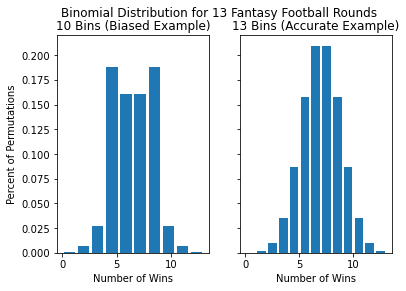

In [8]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.suptitle('Binomial Distribution for 13 Fantasy Football Rounds')
ax[0].set(xlabel='Number of Wins', ylabel='Percent of Permutations', title='10 Bins (Biased Example)')
ax[0].hist(num_wins, rwidth=.8, density=True)
ax[1].set(xlabel='Number of Wins',  title='13 Bins (Accurate Example)')
ax[1].hist(num_wins, rwidth=.8, bins=13, density=True)

plt.show()

You can see that this graph makes it appear that the distribution may not truly be binomial, but rather a bimodal distribution. However, this is not true, if you set the number of bins to 13, you can see it is definitely a binomial distribution. The only reason it doesn't look correct above is because how the data is being grouped together. This is called 'binning bias' when the number of bins supports a story that isn't supported by the data. This is one way people can 'lie' with data or make the data tell a story that they want to tell instead of what the actual truth underlying the data might be.

# Question #3: When comparing the first half of the season to the second half, do players results stay consistent?

## Q3: Explanation of my approach

==> **TLDR**: I compare the first-half to the second-half of the season to see if player's performance remained consistent

In the article I referenced at the beginning of this post ([Researchers find most fantasy sports are based on skill, not luck](https://phys.org/news/2018-11-fantasy-sports-based-skill-luck.html)) it references a study by MIT to check if fantasy sports are based on skill or luck. One of the tests that they used was splitting the season in to a first and second half and then plotting the points on a scatter plot. The first season is the x-axis and the second season is the y-axis (or vice-versa). If players were playing by skill and not based on luck, then you should see something resembling a straight line. If not, the points would just be a cloud of dots due to random performance. 

There were two tests that came to mind for this sort of test, the paired sample t-test and a linear regression. I went with the linear regression since it seemed more appropriate for the amount of data and the type of question I was asking.


## Q3: The code

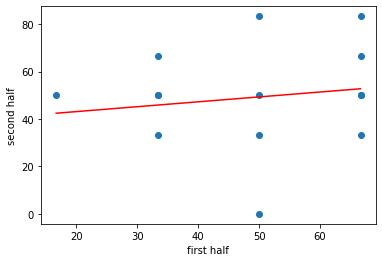

Our correlation indicates a slight positive correlation with a correlation of 0.11858872113956205. The slope of the line is 0.15469613259668563. This matches the slope found when using the scipy linregress function. Here is the linregress output: 

LinregressResult(slope=0.15469613259668505, intercept=42.44935543278085, rvalue=0.11858872113956206, pvalue=0.6863753183651546, stderr=0.3739124858755015)

The p-value is 0.6864, which shows that we fail to reject the null hypothesis again. The null hypothesis states the league's performance doesn't differ from random chance.


In [9]:
# First half of the season win percentage compared to the 2nd half

# Divide the fantasy football data into the first and second halves
first_half_wins = dat.iloc[:,0:6]
second_half_wins = dat.iloc[:,7:]

# Find the percent of first half wins
first_half_pcts = first_half_wins.sum(axis=1)/len(first_half_wins.columns) * 100
second_half_pcts = second_half_wins.sum(axis=1)/len(second_half_wins.columns) * 100

# Combine into back into one DataFrame
performance = pd.concat([first_half_pcts, second_half_pcts], axis=1)
performance.columns = ['first_half','second_half']

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

# Tried regplot - didn't like the formatting and found it easier just to set it up manually for now
# plot = sns.regplot('first_half','second_half', data=performance)
# plot.set(xlim=(0,1))
# plt.show()

# Use matplotlib to plot the points
slope, intercept = np.polyfit(performance['first_half'], performance['second_half'], 1) #1D polynomial
fig, ax = plt.subplots()
ax.scatter(performance['first_half'], performance['second_half'])
ax.set(xlabel='first half',ylabel='second half')
plt.plot([min(performance['first_half']),max(performance['first_half'])], [intercept,slope * max(performance['first_half']) + intercept], color='red') # y=mx+b for the slope
plt.show()

corr = np.corrcoef(performance['first_half'], performance['second_half'])

# Use linregress to see if the line significantly differs from 0
stats_out = stats.linregress(first_half_pcts, second_half_pcts)

print('Our correlation indicates a slight positive correlation with a correlation of {}. The slope of the line is {}. \
This matches the slope found when using the scipy linregress function. Here is the linregress output: \n\n{}\n\n\
The p-value is {:.4f}, which shows that we fail to reject the null hypothesis again. The null hypothesis states the league\'s performance doesn\'t differ from random chance.'\
      .format(corr[0][1], slope, stats_out, stats_out.pvalue))

## Q3: The Answer

==> **TLDR**: The league's results can also be attributed to random chance

The line has a slope of .15, which indicates that for each percent increase in the first half, the second half only increase by .15%. If these were perfectly correlated, we would expect the slope to be 1. A slope of 1% would be a perfect diagonal line since for every 1 percent increase in the first half, the second half also increases by 1 percent. 

The correlation was only .11, which indicates a slight positive correlation. However, when we test to see if the line is statistically significant from 0 using the linregress function, we can see that the p-value is .686, which means we fail to reject the null hypothesis. These results re-affirm our results from question 2, that the league's results cannot be attributed to skill, but luck seems to have played a bigger role in the outcomes.

# Conclusion

==> **TLDR**: There were various factors that could have lead to my league and my results being attributed to random chance. Please upvote if you liked the content :)

Well, despite fantasy sports being more skill than luck according to MIT, that didn't seem to be the case for myself or for the league that I was in. There were a couple reasons I think those who truly did have more skill didn't have the advantage they might have otherwise had. There were a lot of players who had to sit-out due to COVID-19. In addition to players being benched because of COVID-19, there seemed to be quite a few injuries this season in general. When my team was in the playoffs, I think 75% of my team was drafted from waivers. 

Another factor was having such a big league. There weren't a lot of good players available on waivers, which made it hard to switch up players on a 'bye' week. Overall, I ended the season placing 10th out of 14. I blame some of this on Dak Prescott getting injured, but really I think this was a learning experience being my first season and all and I'm sure I could have made some better trades or waiver pick-ups. 

It was great to play fantasy football for the first time and also feed my curiousity by looking into the stats of the game. Please let me know if you have any feedback or see how my analysis could be improved. Hopefully you came away from going through this notebook having a better understanding of binomial distributions and some helpful functions in the numpy and scipy packages. Thanks for reading!

P.S. If you made it this far, an upvote would be appreciated :)

# References

1. [Researchers find most fantasy sports are based on skill, not luck](https://phys.org/news/2018-11-fantasy-sports-based-skill-luck.html)
2. [When Do You Use a Binomial Distribution?](https://www.thoughtco.com/when-to-use-binomial-distribution-3126596)
3. [Combinations vs Permutations](https://medium.com/i-math/combinations-permutations-fa7ac680f0ac)
4. [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.) 
5. [How_do_I_do_a_nonparametric_Binomial_Test_or_One-sample_t-Test](https://www.researchgate.net/post/How_do_I_do_a_nonparametric_Binomial_Test_or_One-sample_t-Test)
6. [Wikipedia - Binomial_sum_variance_inequality](https://en.wikipedia.org/wiki/Binomial_sum_variance_inequality#:~:text=In%20probability%20theory%20and%20statistics,the%20sum%20is%20not%20binomial_)
7. [stackexchange - sum-of-two-independent-binomial-variables](https://math.stackexchange.com/questions/1176385/sum-of-two-independent-binomial-variables)
8. [Dartmouth Textbook - Central Limit Theorem](https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/Chapter9.pdf)
9. [Boston College Textbook - Central Limit Theorem](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html#:~:text=The%20Central%20Limit%20Theorem%20applies,success%22%20on%20any%20given%20trial)
10. [that-common-misconception-about-probabilities](https://medium.com/i-math/that-common-misconception-about-probabilities-3c507b892371)
11. [mathisfun - combinations-permutations](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)
